<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Copy_of_Pawpularity_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install update -Uq fastai 

     |████████████████████████████████| 189 kB 6.3 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 


In [4]:
import fastai 
fastai.__version__

'2.5.3'

In [5]:
# Specifying the data paths 
train_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/'
test_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/'

train_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train.csv'
test_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test.csv'
sample_sub_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/sample_submission.csv'




In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
# import fastai 
# from fastai.vision.all import * 
# from fastai import * 

# Loading in the data paths 
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)
sample_sub_df = pd.read_csv(sample_sub_path)

train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [7]:
# Is there any null values 
train_df.isna().sum() 

Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
dtype: int64

In [8]:
# How many samples 
train_df.shape[0]

9912

In [9]:
# Append the full path 
def append_ext(fn , train = True):
  if train:
    return f'{train_image_path}{fn}.jpg'
  else:
    return f'{test_image_path}{fn}.jpg'

# Applying the above function on our dataframe 
train_df['full_path'] = train_df['Id'].apply(lambda x: append_ext(x))
test_df['full_path'] = test_df['Id'].apply(lambda x: append_ext(x , train = False))

train_df.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,full_path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,/content/drive/MyDrive/Kaggle_Competition/petf...
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,/content/drive/MyDrive/Kaggle_Competition/petf...
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,/content/drive/MyDrive/Kaggle_Competition/petf...
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,/content/drive/MyDrive/Kaggle_Competition/petf...
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,/content/drive/MyDrive/Kaggle_Competition/petf...
5,001dd4f6fafb890610b1635f967ea081,0,0,1,0,0,0,0,0,0,0,0,1,74,/content/drive/MyDrive/Kaggle_Competition/petf...
6,0023b8a3abc93c712edd6120867deb53,0,1,1,1,0,0,0,0,1,1,0,0,22,/content/drive/MyDrive/Kaggle_Competition/petf...
7,0031d6a9ef7340f898c3e05f92c7bb04,0,1,1,0,0,0,1,1,0,0,1,0,35,/content/drive/MyDrive/Kaggle_Competition/petf...
8,0042bc5bada6d1cf8951f8f9f0d399fa,0,1,1,1,0,0,0,0,0,0,0,0,53,/content/drive/MyDrive/Kaggle_Competition/petf...
9,0049cb81313c94fa007286e9039af910,0,1,1,1,0,0,0,0,0,0,0,0,21,/content/drive/MyDrive/Kaggle_Competition/petf...


In [11]:
import matplotlib.image as mpimg 
import random 
from matplotlib.pyplot import figure 

random_filename = random.choice(train_df['full_path'].tolist())

# Plotting the image 
im = mpimg.imread(random_filename)
figure(figsize = (10 , 8))
plt.imshow(im)
plt.axis('off');


OSError: ignored

In [ ]:
# Applying the transforms 

item_tfms=RandomResizedCrop(460)
batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
train_data = Path(train_image_path)

In [ ]:


# Creating the datablock 

paw_block = DataBlock(blocks = (ImageBlock , RegressionBlock()) , 
                      get_x = ColReader('full_path') , 
                      get_y = ColReader('Pawpularity') , 
                      splitter = RandomSplitter() , 
                      item_tfms = item_tfms , 
                      batch_tfms = batch_tfms)

# Getting the summary 
paw_block.summary(train_df)

Setting-up type transforms pipelines
0     0007de18844b0dbbb5e1f607da0606e0  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg
1     0009c66b9439883ba2750fb825e1d7db  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg
2     0013fd999caf9a3efe1352ca1b0d937e  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0013fd999caf9a3efe1352ca1b0d937e.jpg
3     0018df346ac9c1d8413cfcc888ca8246  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0018df346ac9c1d8413cfcc888ca8246.jpg
4     001dc955e10590d3ca4673f034feeef2  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/001dc955e10590d3ca4673f034feeef2.jpg
...                                ...  ...                                                                                                               ...
9907  ffbfa0383

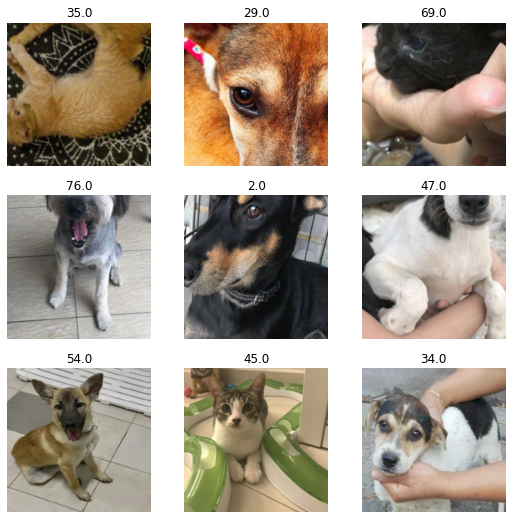

In [ ]:

# Creating the DataLoaders 
paw_dls = paw_block.dataloaders(train_df , batch_size= 64)

# Viewing the batch of image 
paw_dls.show_batch()

In [ ]:
# Min and max 
min(train_df['Pawpularity']) , max(train_df['Pawpularity'])

(1, 100)

In [ ]:

# Building a learner 
learn = cnn_learner(paw_dls , arch= resnet101 , loss_func= MSELossFlat() ,
                    metrics = rmse   )



Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

SuggestedLRs(lr_min=0.09120108485221863, lr_steep=0.0691830962896347)

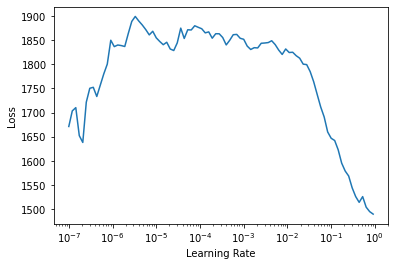

In [ ]:
# Finding the learning rate 
learn.lr_find(suggestions= True)

In [ ]:
# Fitting for 3 epochs 
learn.fit_one_cycle(3 , 3e-3)

epoch,train_loss,valid_loss,_rmse,time
0,1305.422241,659.368164,25.678165,02:58
1,468.728485,365.005890,19.105129,02:57
2,381.558655,349.427277,18.692974,02:57


In [ ]:
from fastai.test_utils import *


In [ ]:
# Unfreezing all the networks 
learn.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=5.248074739938602e-05)

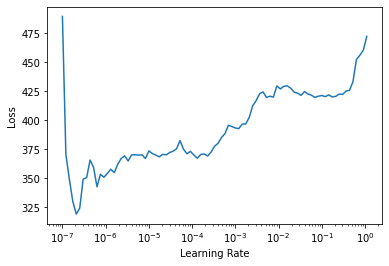

In [ ]:
 # Finding the learning rate 
learn.lr_find(suggestions= True)

In [ ]:
# Fine tuning the model 
learn.fit_one_cycle(20 , lr_max= slice(1e-7 , 1e-6))

epoch,train_loss,valid_loss,_rmse,time
0,358.390564,349.517792,18.695395,03:04
1,359.443878,348.403015,18.665558,03:03
2,348.524963,348.936432,18.679838,03:03
3,373.283051,350.378265,18.718395,03:03
4,359.894318,349.613800,18.697964,03:01
5,369.678070,345.589813,18.590048,03:01
6,358.460663,346.942993,18.626406,03:02
7,370.224731,345.772858,18.594971,03:01
8,362.435760,345.009460,18.574430,03:01
9,364.503754,345.492157,18.587418,03:01


In [ ]:
test_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,full_path
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/80bc3ccafcc51b66303c2c263aa38486.jpg
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/8f49844c382931444e68dffbe20228f4.jpg
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/b03f7041962238a7c9d6537e22f9b017.jpg
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/e0de453c1bffc20c22b072b34b54e50f.jpg


In [ ]:
test_file_lists = [Path(pth) for pth in test_df['full_path'].tolist()]
test_file_lists

[Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/80bc3ccafcc51b66303c2c263aa38486.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/8f49844c382931444e68dffbe20228f4.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/b03f7041962238a7c9d6537e22f9b017.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/e0de453c1bffc20c22b072b34b54e50f.jpg')]

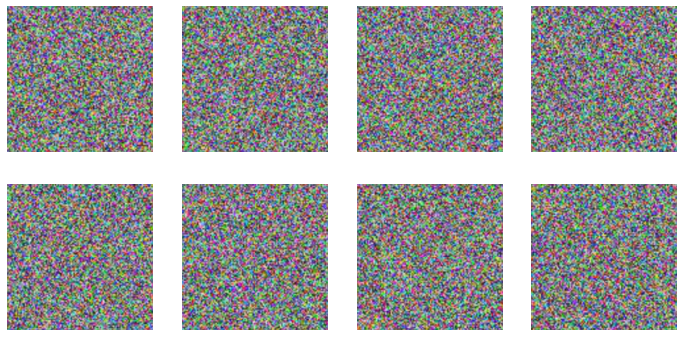

In [ ]:
# Test Dataloader 
test_dls = paw_dls.test_dl(test_file_lists)

test_dls.show_batch()

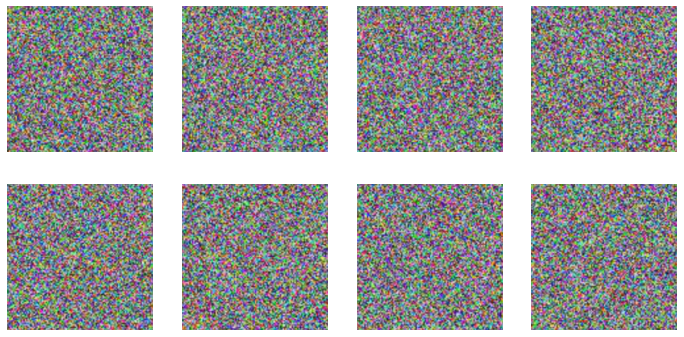

In [ ]:
test_fns = get_image_files(test_image_path)

# Test Dataloader 
test_dls = paw_dls.test_dl(test_fns)

test_dls.show_batch()

In [ ]:
# Saving the model 
learn.export(fname = 'new_model_resnet101.pkl')

In [ ]:
# Getting predictions 
test_pred = learn.get_preds(test_dls)
test_pred

TypeError: ignored

In [ ]:
get_image

In [ ]:
import os 
test_data = pd.DataFrame()

# Get the predictions 
test_dl = paw_dls.test_dl(get_image_files(test_image_path))
test_pred = learn.get_preds(dl = test_dl)

test_data['Id'] = [img[:-4]for img in os.listdir(test_image_path)]
test_data

,Id
0,e0de453c1bffc20c22b072b34b54e50f
1,8f49844c382931444e68dffbe20228f4
2,b03f7041962238a7c9d6537e22f9b017
3,4128bae22183829d2b5fea10effdb0c3
4,4e429cead1848a298432a0acad014c9d
5,c978013571258ed6d4637f6e8cc9d6a3
6,80bc3ccafcc51b66303c2c263aa38486
7,43a2262d7738e3d420d453815151079e


In [ ]:
test_data['Pawpularity'] = test_pred[0].detach().numpy()
test_data

,Id,Pawpularity
0,e0de453c1bffc20c22b072b34b54e50f,35.697269
1,8f49844c382931444e68dffbe20228f4,36.658699
2,b03f7041962238a7c9d6537e22f9b017,37.590248
3,4128bae22183829d2b5fea10effdb0c3,37.052662
4,4e429cead1848a298432a0acad014c9d,37.285965
5,c978013571258ed6d4637f6e8cc9d6a3,37.529808
6,80bc3ccafcc51b66303c2c263aa38486,37.181038
7,43a2262d7738e3d420d453815151079e,36.674160


In [ ]:
sample_sub_df

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,67.75
1,43a2262d7738e3d420d453815151079e,59.15
2,4e429cead1848a298432a0acad014c9d,20.02
3,80bc3ccafcc51b66303c2c263aa38486,94.53
4,8f49844c382931444e68dffbe20228f4,89.82
5,b03f7041962238a7c9d6537e22f9b017,65.50
6,c978013571258ed6d4637f6e8cc9d6a3,71.42
7,e0de453c1bffc20c22b072b34b54e50f,5.85


# TensorFlow Approach 

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub 
from tensorflow.keras import layers#

### Trying with EfficientNetV2 Hub Model (Single modal) 

In [ ]:
# Importing the EfficientNetV2 model 
efficientnet_v2_layer = hub.KerasLayer(handle = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2' , 
                                       trainable = False , 
                                       name = 'EfficientNet_V2' )

In [ ]:
# Getting ready image file names and pawpularity score list 

train_img_fns = train_df.full_path.tolist()
train_scores = train_df.Pawpularity.tolist()

len(train_img_fns), len(train_scores)

(9912, 9912)

In [ ]:
def load_img(file_path , label):
  im = tf.io.read_file(file_path)
  im = tf.image.decode_jpeg(im , channels = 3)
  im = tf.image.convert_image_dtype(im , tf.float32)
  im = tf.image.resize(im , size = (224 , 224))
  im = im / 255.
  return im , label

In [ ]:
# Creating a Dataset 
train_ds = tf.data.Dataset.from_tensor_slices((train_img_fns , train_scores))

# Applying the preprocessing function 
train_ds = train_ds.map(lambda x , y: load_img(x , y) , num_parallel_calls = tf.data.AUTOTUNE)

# Appplying batch and prefetching the dataset 
train_ds = train_ds.batch(64).prefetch(tf.data.AUTOTUNE)

train_ds

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
# Bulding a model 
input = layers.Input(shape = (224 ,224 , 3))
x = efficientnet_v2_layer(input)
x = layers.Dense(512 , activation= 'relu')(x)
output = layers.Dense(9912 , activation = 'linear')(x)

# Packing into a model 
model = tf.keras.Model(input , output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
EfficientNet_V2 (KerasLayer) (None, 1280)              5919312   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_9 (Dense)              (None, 9912)              5084856   
Total params: 11,660,040
Trainable params: 5,740,728
Non-trainable params: 5,919,312
_________________________________________________________________


In [ ]:
# Compiling the model 
rmse = tf.keras.metrics.RootMeanSquaredError()

model.compile(loss = tf.keras.losses.MeanSquaredError()  , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = [rmse])

# Fitting the model 
history = model.fit(train_ds , 
                    epochs = 20 )

Epoch 1/20
155/155 [==============================] - 66s 414ms/step - loss: 520.7979 - root_mean_squared_error: 22.8210
Epoch 2/20
155/155 [==============================] - 64s 413ms/step - loss: 426.3602 - root_mean_squared_error: 20.6485
Epoch 3/20
155/155 [==============================] - 64s 416ms/step - loss: 427.4259 - root_mean_squared_error: 20.6743
Epoch 4/20
155/155 [==============================] - 64s 415ms/step - loss: 427.9888 - root_mean_squared_error: 20.6879
Epoch 5/20
155/155 [==============================] - 63s 405ms/step - loss: 428.2461 - root_mean_squared_error: 20.6941
Epoch 6/20
155/155 [==============================] - 63s 406ms/step - loss: 428.3716 - root_mean_squared_error: 20.6971
Epoch 7/20
155/155 [==============================] - 61s 395ms/step - loss: 428.4380 - root_mean_squared_error: 20.6987
Epoch 8/20
155/155 [==============================] - 63s 408ms/step - loss: 428.4732 - root_mean_squared_error: 20.6996
Epoch 9/20
155/155 [============

In [ ]:
model.save('tensorflow_model')

INFO:tensorflow:Assets written to: tensorflow_model/assets


INFO:tensorflow:Assets written to: tensorflow_model/assets


In [ ]:
!mv tensorflow_model /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score

# Fastai timm 

Integrating ross wightman's library of pytorch models into fastai. Lets break down in simple steps (more like an overview) about what we are upto: 
- First create a DataBlock api and keep our dataloaders ready. 

> Our regular workflow will be creating a `cnn_learner` and fine tune the model, but for the timm model the workflow is bit different. 

> Fastai has a `create_body` function which is called during the `cnn_learner` resulting just returning the body of the architecture by slicing off the final Linear layer (unpooled features). So now we have to create our **own `create_body`** function that aligns with the timm models 

- Create own `create_body` function and that can be called as `create_timm_body` and use **`nn.Sequential` to wrap our head and body together**.
- Pass into the `Learner` class specifying the splitter to be `default_split`, the **default_splitter** expects the body in model[0] and the head in model[1] to split our layer groups. 
- Create a `timm_learner` just like the `cnn_learner`, leverage some functionality from the cnn learner to our timm learner. 
- Before that we gotta make sure whether we have `create_timm_body` function. 






In [ ]:
# Applying the transforms 

item_tfms=RandomResizedCrop(460)
batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
train_data = Path(train_image_path)

# Creating the datablock 

paw_block = DataBlock(blocks = (ImageBlock , RegressionBlock()) , 
                      get_x = ColReader('full_path') , 
                      get_y = ColReader('Pawpularity') , 
                      splitter = RandomSplitter() , 
                      item_tfms = item_tfms , 
                      batch_tfms = batch_tfms)

# Getting the summary 
paw_block.summary(train_df)
# Creating the DataLoaders 
paw_dls = paw_block.dataloaders(train_df , batch_size= 64)

# Viewing the batch of image 
paw_dls.show_batch()

In [14]:
# Installing timm and importing it 
#!pip install timm
import timm 

In [15]:
# Listing out the models available 
timm.list_models()[:30]

['adv_inception_v3',
 'bat_resnext26ts',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspdarknet53_iabn',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'darknet53']

In [16]:
# Searching for models in timm 
timm.list_models('*efficientnet*')[:20]

['eca_efficientnet_b0',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_el_pruned']

## Create the needed timm functions 
- `create_timm_body`
- `timm_learner`
- `create_timm_model`

In [27]:
from fastai.vision.learner import create_head , _update_first_layer , create_body

In [17]:
m# Creating the timm body (that extracts the features from an image)

def create_timm_body(arch:str , pretrained = True , cut = None , n_in = 3):

  '''
  Creates a body from any model / architecture in the timm library 

  '''

  # Creating the model with the use of timm.create_model function 
  model = timm.create_model(arch , pretrained = pretrained , num_classes = 0 , 
                            global_pool = '')
  
  # Update hte fist layer 

Object `create_head` not found.


In [19]:
timm.create_model??

In [ ]:
dum_model = timm.create_model('efficientnet_b3a' , pretrained = True , num_classes = 0 , 
                            global_pool = '')
dum_model